In [1]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
d = pd.read_csv('regression_data2.csv')
print(d[:10])
x = d.iloc[:, 1:-1].values
y = d.iloc[:, -1].values

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [3]:
#Feature Scaling (Standarization)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [4]:
x=np.concatenate((np.ones((x.shape[0],1)),x,x**2,x**3),axis=1)
y=y.reshape((y.shape[0],1))
theta=np.zeros(shape=(x.shape[1],1))
print("X Shape : ",x.shape)
print("Y Shape : ",y.shape)
print("Theta Shape : ",theta.shape)

X Shape :  (10, 4)
Y Shape :  (10, 1)
Theta Shape :  (4, 1)


In [5]:
#hypothesis function
def h(x,theta):
    #h(x)=x.theta
    return np.dot(x,theta)

In [6]:
#gradient descent function
def gradientDescent(theta,alpha=0.02):
    #taking 1000 iterations for convergence
    for i in range(2000):
        theta=theta-alpha*(1/x.shape[0])*np.sum((h(x,theta)-y)*x,axis=0).reshape((theta.shape[0],1))
    return(theta)

In [7]:
theta=gradientDescent(theta,alpha=0.2)
print(theta)

[[ 89187.5       ]
 [ 58939.51404173]
 [160312.5       ]
 [ 97629.9469015 ]]


In [8]:
def predict(x,theta):
    #horizontal stacking of x with ones for evaluation of theta0
    return h(x,theta)

In [9]:
#predict(x_test,theta)

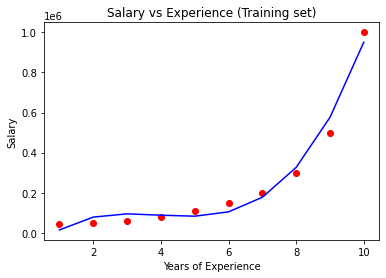

In [10]:
# Visualising the Training set results
plt.scatter(sc.inverse_transform(x)[:,[1]], y, color = 'red')
plt.plot(sc.inverse_transform(x)[:,[1]],predict(x,theta),color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()